# Machine Learning with Python - Heuristics
Many times a simple rule-of-thumb performs better than advanced ML

### Human Learn
Super clever library to manage huristic models like ML scikit-learn models

In [10]:
# need to install this now becasue it isn't in the container.
!pip install human-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.4/116.4 kB 2.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 6.5 MB/s eta 0:00:00a 0:00:01


In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

#read in our titanic data
df_og = pd.read_csv('data/train.csv') 

In [2]:
df_og.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#split the data set into train and test sets remove any non-numeric columns for the example
X, y = df_og.drop(columns=['PassengerId','Name','Ticket','Cabin','Embarked']), df_og['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print('size of X_train') 
print(X_train.shape)
print('size of X_test')
print(X_test.shape)

size of X_train
(596, 7)
size of X_test
(295, 7)


In [4]:
X_train.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
6,0,1,male,54.0,0,0,51.8625
718,0,3,male,NaN,0,0,15.5000
685,0,2,male,25.0,1,2,41.5792
73,0,3,male,26.0,1,0,14.4542
882,0,3,female,22.0,0,0,10.5167


In [5]:
X_train['Survived'].mean()

0.3724832214765101

The human learn package provides a number of methods to visually explore the data

In [6]:
(X_train.groupby(["Sex","Pclass"])
 .Survived
 .mean())

Sex     Pclass
female  1         0.949153
        2         0.979167
        3         0.464646
male    1         0.315789
        2         0.181818
        3         0.147679
Name: Survived, dtype: float64

In [7]:

(X_train.groupby(["Sex","Pclass"])
 .Survived
 .count())

Sex     Pclass
female  1          59
        2          48
        3          99
male    1          76
        2          77
        3         237
Name: Survived, dtype: int64

<AxesSubplot:>

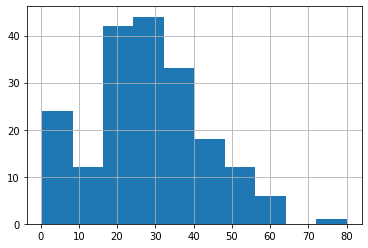

In [8]:
X_train[X_train['Survived']==1]['Age'].hist()

<AxesSubplot:>

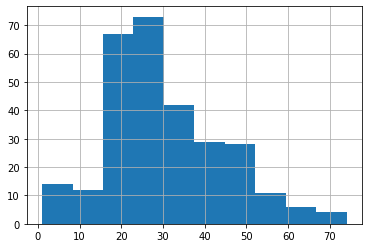

In [9]:
X_train[X_train['Survived']==0]['Age'].hist()

In [11]:
from hulearn.classification import FunctionClassifier
#with this information I'm going to build a function that uses a heuristic to predic
def sex_pclass(dataf):
    """
    The assumption is that women and children survive
    """
    
    women_rule = (dataf['Pclass'] < 3.0) & (dataf['Sex'] == 'female')
    children_rule = (dataf['Pclass'] < 3.0) & (dataf['Age'] <= 15)
    pred =  women_rule | children_rule
    
    return np.array(pred).astype(int)

heuristic_model = FunctionClassifier(sex_pclass)

In [13]:
sex_pclass(X_train)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

preds = heuristic_model.fit(X_train, y_train).predict(X_train)

print(('accuray:' + str(accuracy_score(y_train, preds))))
print(('precision:' + str(precision_score(y_train, preds))))
print(('recall:' + str(recall_score(y_train, preds))))
print(('f1:' + str(f1_score(y_train, preds))))
print('confusion_matrix')
print(confusion_matrix(y_train, preds))

accuray:0.8053691275167785
precision:0.9649122807017544
recall:0.4954954954954955
f1:0.6547619047619048
confusion_matrix
[[370   4]
 [112 110]]


In [15]:
#now see how the rule works on the hold out test set
preds = heuristic_model.fit(X_train, y_train).predict(X_test)

print(('accuray:' + str(accuracy_score(y_test, preds))))
print(('precision:' + str(precision_score(y_test, preds))))
print(('recall:' + str(recall_score(y_test, preds))))
print(('f1:' + str(f1_score(y_test, preds))))
print('confusion_matrix')
print(confusion_matrix(y_test, preds))

accuray:0.7898305084745763
precision:0.9264705882352942
recall:0.525
f1:0.6702127659574468
confusion_matrix
[[170   5]
 [ 57  63]]
